In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import sys
import scipy.io

In [2]:
# Get path to MCMCwithODEs_primer (3 levels up)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)


In [3]:
def lotka_volterra(z, t, params):
    x, y = z
    alpha = params['alpha']
    beta = params['beta']
    delta = params['delta']
    gamma = params['gamma']
    
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]



In [4]:
true_params = {
    'alpha': 1.0,    # prey growth rate
    'beta': 0.1,     # predation rate
    'delta': 0.075,  # predator growth per prey eaten
    'gamma': 1.5     # predator death rate
}

t = np.linspace(0, 20, 200)
z0 = [40, 9]  # initial population: 40 prey, 9 predators


In [5]:
true_sol = odeint(lotka_volterra, z0, t, args=(true_params,))
noisy_data = true_sol + np.random.normal(0, 1.0, true_sol.shape)


In [6]:
def simulate_model(params):
    sol = odeint(lotka_volterra, z0, t, args=(params,))
    return sol  # shape: (N, 2)

def mse(output):
    return np.mean((output - noisy_data)**2)

In [7]:
param_bounds = {
    'alpha': (0.5, 10),
    'beta': (0.05, 0.9),
    'delta': (0.05, 0.9),
    'gamma': (1.0, 5.0)
}

initial_guess = {
    'alpha': 5,
    'beta': 0.5,
    'delta': 0.7,
    'gamma': 4.0
}

In [8]:
import sys
sys.path.append('./..')  # or absolute path if needed

from invode import ODEOptimizer, lhs_sample

In [9]:
# Run optimizer
optimizer = ODEOptimizer(
    ode_func=simulate_model,
    error_func=mse,
    param_bounds=param_bounds,
    initial_guess=initial_guess,
    seed=42,
    num_top_candidates=3
)





In [10]:

optimizer.fit()


/var/folders/5k/c26bnjc5605gl0j8tyx59s240000gp/T/ipykernel_52064/1989443935.py:2: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(lotka_volterra, z0, t, args=(params,))


({'alpha': 0.9942779041092709,
  'beta': 0.09869028858084401,
  'delta': 0.07534068781450981,
  'gamma': 1.5090006298607215},
 0.9288766366017623)

In [11]:
optimizer.summary()

🔍 ODEOptimizer Summary:
  ode_func: simulate_model
  error_func: mse
  param_bounds: {'alpha': (0.5, 10), 'beta': (0.05, 0.9), 'delta': (0.05, 0.9), 'gamma': (1.0, 5.0)}
  initial_guess: {'alpha': 5, 'beta': 0.5, 'delta': 0.7, 'gamma': 4.0}
  n_samples: 100
  num_iter: 10
  num_top_candidates: 3
  do_local_opt: True
  local_method: L-BFGS-B
  shrink_rate: 0.5
  parallel: False
  local_parallel: False
  verbose: False
  verbose_plot: False
  seed: 42
  best_error: 0.9288766366017623
  best_params: {'alpha': 0.9942779041092709, 'beta': 0.09869028858084401, 'delta': 0.07534068781450981, 'gamma': 1.5090006298607215}


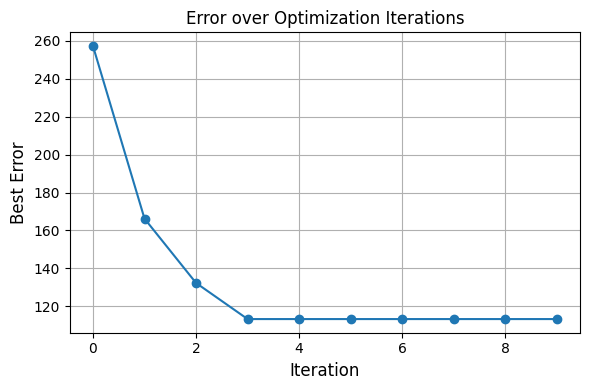

In [17]:
optimizer.plot_error_history()

In [13]:
optimizer.best_params

{'alpha': 0.9942779041092709,
 'beta': 0.09869028858084401,
 'delta': 0.07534068781450981,
 'gamma': 1.5090006298607215}

In [14]:
optimizer.best_error

0.9288766366017623

In [15]:
history = optimizer.get_top_candidates_history()

# Example: print best candidate from each iteration
for i, candidates in enumerate(history):
    print(f"Iteration {i+1}: Best error = {candidates[0][1]:.4f}")

Iteration 1: Best error = 257.1357
Iteration 2: Best error = 166.2408
Iteration 3: Best error = 132.3761
Iteration 4: Best error = 113.3658
Iteration 5: Best error = 119.7756
Iteration 6: Best error = 141.6606
Iteration 7: Best error = 147.6182
Iteration 8: Best error = 125.0690
Iteration 9: Best error = 130.6449
Iteration 10: Best error = 139.2184


In [16]:
df = optimizer.get_top_candidates_table()
print(df)

    iteration  rank       error     alpha      beta     delta     gamma
0           1     1  257.135730  4.385283  0.573670  0.496909  4.750834
1           1     2  259.117359  3.146908  0.546651  0.563712  3.948248
2           1     3  263.795732  3.698483  0.664474  0.491804  4.296262
3           2     1  166.240819  1.037087  0.756400  0.381194  4.186847
4           2     2  183.456498  1.637559  0.508513  0.573632  3.451435
5           2     3  187.710111  3.421203  0.458104  0.291025  4.314317
6           3     1  132.376051  1.088866  0.657251  0.297442  3.470319
7           3     2  148.167524  0.840392  0.603924  0.284036  4.434190
8           3     3  150.488699  3.570604  0.447930  0.167069  4.082852
9           4     1  113.365783  0.716937  0.502098  0.284090  4.804790
10          4     2  138.915752  0.909915  0.812395  0.304488  4.447642
11          4     3  140.764985  1.201605  0.672126  0.279445  2.987001
12          5     1  119.775565  0.815650  0.651318  0.309828  4